In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2
)

In [ ]:
train_folder = "/content/drive/MyDrive/All__Datasets/brain tumor/Training"
batch_size = 32

train_data = data_generator.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 5712 images belonging to 4 classes.


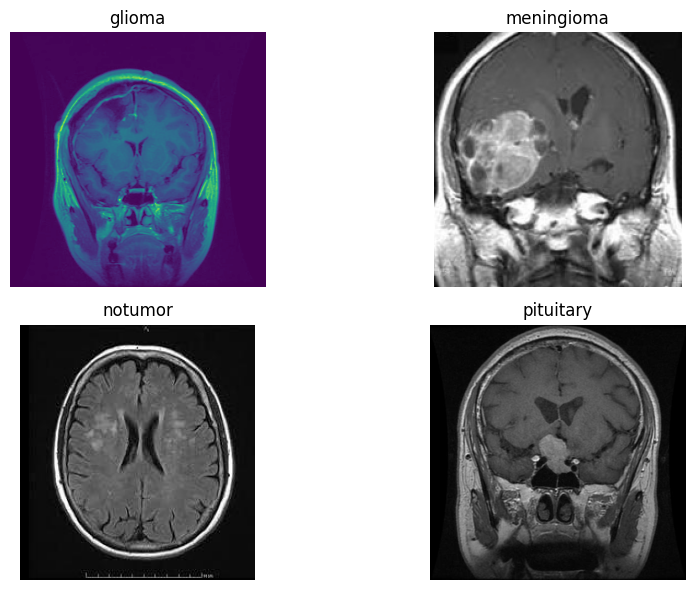

In [ ]:
import matplotlib.pyplot as plt
import os
train_dir = "/content/drive/MyDrive/All__Datasets/brain tumor/Training"
valid_extensions=('.jpg', '.png', '.jpeg')

categories = ["glioma", "meningioma", "notumor", "pituitary"]

plt.figure(figsize=(10, 6))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    if not image_path.lower().endswith(valid_extensions):
        continue
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_data, epochs=20)

Epoch 1/20
179/179 [==============================] - 1411s 8s/step - loss: 0.8791 - accuracy: 0.6499
Epoch 2/20
179/179 [==============================] - 41s 228ms/step - loss: 0.5959 - accuracy: 0.7582
Epoch 3/20
179/179 [==============================] - 40s 222ms/step - loss: 0.5028 - accuracy: 0.8088
Epoch 4/20
179/179 [==============================] - 40s 224ms/step - loss: 0.4465 - accuracy: 0.8241
Epoch 5/20
179/179 [==============================] - 42s 237ms/step - loss: 0.4085 - accuracy: 0.8423
Epoch 6/20
179/179 [==============================] - 41s 230ms/step - loss: 0.3745 - accuracy: 0.8494
Epoch 7/20
179/179 [==============================] - 41s 227ms/step - loss: 0.3347 - accuracy: 0.8701
Epoch 8/20
179/179 [==============================] - 39s 218ms/step - loss: 0.2987 - accuracy: 0.8885
Epoch 9/20
179/179 [==============================] - 41s 229ms/step - loss: 0.2926 - accuracy: 0.8909
Epoch 10/20
179/179 [==============================] - 41s 228ms/step - lo

In [ ]:
 history.history.keys()

dict_keys(['loss', 'accuracy'])

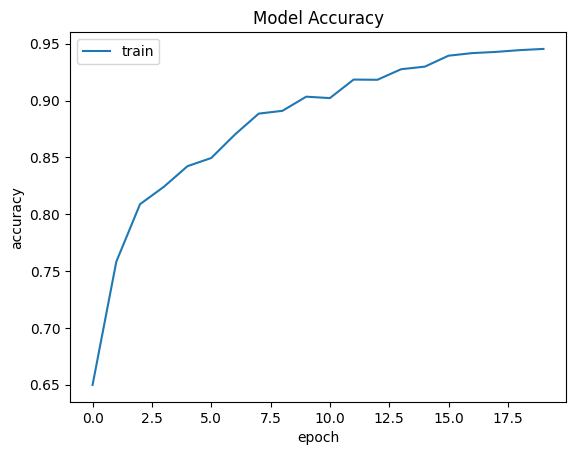

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

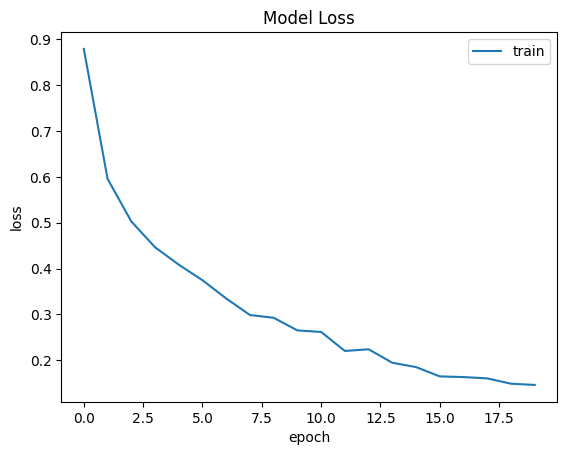

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/saved models/brain_tumor_2.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/saved models/brain_tumor_2.h5')

In [ ]:
test_image_path = '/content/drive/MyDrive/All__Datasets/brain tumor/Testing/pituitary/Te-pi_0294.jpg'
test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (224, 224))
test_image = np.expand_dims(test_image, axis=-1)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0

In [ ]:
prediction = loaded_model.predict(test_image)
predicted_class_index = np.argmax(prediction)
class_names = train_data.class_indices
predicted_class = [key for key, value in class_names.items() if value == predicted_class_index][0]

1/1 [==============================] - 0s 19ms/step


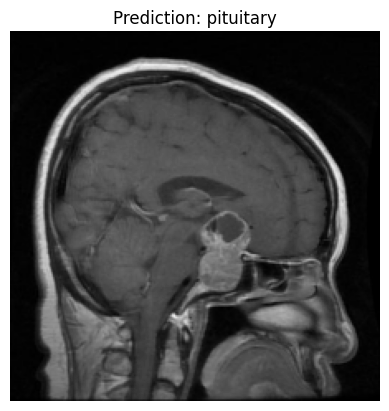

In [ ]:
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()